<center><h2>Python Script to Plot Yen values versus US Dollars<h/2></center>

I am getting the Yen to US dollar exchange rates from [here](http://research.stlouisfed.org/fred2/data/EXJPUS.txt) provided by the U.S. Federal Reserve.

<IPython.core.display.Javascript object>


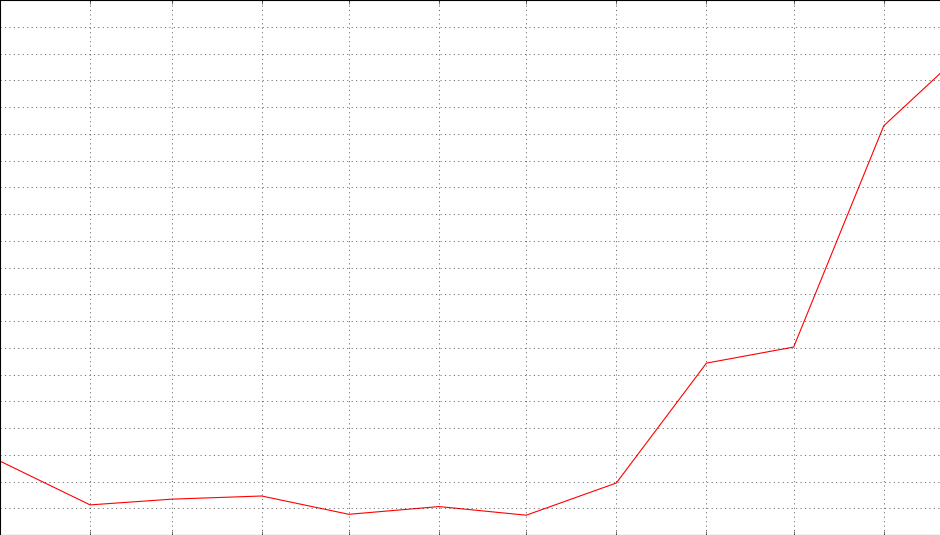

In [3]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, WeekdayLocator, DateFormatter, DayLocator
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

from matplotlib.ticker import MultipleLocator
from datetime import datetime

############## Data metadata ############
# Text file with actual yen data not starting until row 29. First 28 rows of data are just descriptions of the data
# Data consists of 2 columns that are separated/delimited by white space:
#    first column of the data is a string date in YYYY-mm-dd format, 
#    second column is the yen-US dollar exchange

############## Data Retrieval ############
# Using converters parameter, convert the string dates into Python datetime objects
yen_data = pd.read_csv('http://research.stlouisfed.org/fred2/data/EXJPUS.txt', skiprows=28,
                       index_col=0, delim_whitespace=True,
                       converters={0: lambda x: datetime.strptime(x, "%Y-%m-%d")})
    
############## Creation of Top Chart ###########
fig, axes = plt.subplots(2, 1)  # Create a grid of 2 rows and 1 column of charts (2 charts total)

# Let's define x-axis date interval sizes: year, month, week, or day
year   = YearLocator()
month  = MonthLocator(bymonth=range(1,13),  bymonthday=1, interval=1)
week   = WeekdayLocator(byweekday=MO)  # Every MOnday
day    = DayLocator(bymonthday=range(1,32), interval=1)

axes[0] = fig.add_axes([0, 1.3, 1.5, 1]) # left, bottom, width, height

# Let's define x-axis formatting
axes[0].xaxis.set_major_locator(year)
axes[0].xaxis.grid(which='major')

# Let's define y-axis formatting
y_major_ticks = MultipleLocator(50)
axes[0].yaxis.set_major_locator(y_major_ticks)
axes[0].yaxis.set_ticks_position('right')   # Not sure why 'both' don't work
axes[0].yaxis.set_label_position('right')
axes[0].yaxis.grid(which='major')

# Now plot the data...
axes[0].plot_date(yen_data.index, yen_data.values, 'r')
axes[0].set_title("Yen-to-US$ Exchange Rate Since 1971", weight="bold")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Yen-US$")
plt.setp(axes[0].get_xticklabels(), rotation=-90)

############## Prepare 2nd data set for bottom chart ###########
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#partial-string-indexing
today = datetime.today()
this_year = today.year
last_year = this_year - 1
yen2yrs = yen_data[str(last_year):str(this_year)]  # Filter our data set to just last 2 calendar years

############## Creation of Bottom Chart ###########
axes[1] = fig.add_axes([0, 0, 1.5, 1]) # left, bottom, width, height

# Let's define x-axis formatting
monthsFmt = DateFormatter("%b '%y")
axes[1].xaxis.set_major_locator(month)
axes[1].xaxis.set_major_formatter(monthsFmt)
axes[1].xaxis.grid(which='major')

# Let's define y-axis formatting
y_major_ticks = MultipleLocator(1)
axes[1].yaxis.set_major_locator(y_major_ticks)
axes[1].yaxis.set_ticks_position('right')   # Not sure why 'both' don't work
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.grid(which='major')

# Now plot the data...
axes[1].plot_date(yen2yrs.index, yen2yrs.values, 'r')
axes[1].set_title("Yen-to-US$ Exchange Rate of Last 2 Calendar Years", weight="bold")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Yen-US$")
plt.setp(axes[1].get_xticklabels(), rotation=-90)
plt.show()